## trainging dataset 준비
#### CSV 파일 생성: 이미지 경로와 70개의 키포인트 좌표(x1, y1, ..., x70, y70)를 저장할 CSV 파일을 생성합니다.

In [1]:
import os
import json
import csv
import shutil

# 원본 이미지와 JSON 파일이 있는 디렉토리
image_root_dir = 'Training_output/[원천]keypoint(준통제환경)'
json_root_dir = 'Training_output/[라벨]keypoint(준통제환경)'

# 출력 디렉토리 설정
output_image_dir = 'keras_dataset/images/train'
output_annotation_dir = 'keras_dataset/annotations/train'

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_annotation_dir, exist_ok=True)

# CSV 파일 생성
csv_file = 'keras_dataset/annotations/train_annotations.csv'
with open(csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    header = ['image_path'] + [f'x{i}' for i in range(1, 71)] + [f'y{i}' for i in range(1, 71)]
    csvwriter.writerow(header)

    # JSON 파일 리스트 가져오기
    json_files = []
    for root, dirs, files in os.walk(json_root_dir):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))

    # 각 JSON 파일에 대해 처리
    for json_file in json_files:
        # 이미지 파일 경로 설정
        relative_path = os.path.relpath(json_file, json_root_dir)
        image_file = os.path.join(image_root_dir, os.path.splitext(relative_path)[0] + '.jpg')

        # 이미지 파일 존재 여부 확인
        if not os.path.exists(image_file):
            print(f"이미지 파일을 찾을 수 없습니다: {image_file}")
            continue

        # JSON 파일 열기
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
        except json.JSONDecodeError as e:
            print(f"JSONDecodeError 발생: {json_file} - {e}")
            continue
        except Exception as e:
            print(f"JSON 파일을 열 수 없습니다: {json_file} - {e}")
            continue

        # 키포인트 데이터 추출
        try:
            keypoints = data['ObjectInfo']['KeyPoints']['Points']
            count = int(data['ObjectInfo']['KeyPoints']['Count'])
            if count != 70:
                print(f"키포인트 수가 70이 아닙니다: {json_file} - Count: {count}")
                continue
        except KeyError as e:
            print(f"키가 존재하지 않습니다: {json_file} - {e}")
            continue
        except Exception as e:
            print(f"키포인트 데이터를 추출하는 중 오류 발생: {json_file} - {e}")
            continue

        # 키포인트 좌표를 float으로 변환하여 리스트에 저장
        try:
            points = []
            for i in range(count):
                x = float(keypoints[2 * i])
                y = float(keypoints[2 * i + 1])
                points.extend([x, y])
        except IndexError as e:
            print(f"키포인트 인덱스 오류: {json_file} - {e}")
            continue
        except ValueError as e:
            print(f"키포인트 값 변환 오류: {json_file} - {e}")
            continue

        # 이미지 복사
        output_image_path = os.path.join(output_image_dir, os.path.basename(image_file))
        if not os.path.exists(output_image_path):
            shutil.copy(image_file, output_image_path)

        # CSV에 기록
        relative_image_path = os.path.relpath(output_image_path, 'dataset/images/train')
        row = [relative_image_path] + points
        csvwriter.writerow(row)

print("데이터 변환이 완료되었습니다.")

JSONDecodeError 발생: Training_output/[라벨]keypoint(준통제환경)/Q_084_70_M_05_M0_G0_C0/Q_084_70_M_05_M0_G0_C0_21.json - Expecting value: line 1 column 1 (char 0)
데이터 변환이 완료되었습니다.


# Val dataset 준비

In [2]:
# 출력 디렉토리 설정
output_image_dir_val = 'keras_dataset/images/val'
output_annotation_dir_val = 'keras_dataset/annotations/val'

os.makedirs(output_image_dir_val, exist_ok=True)
os.makedirs(output_annotation_dir_val, exist_ok=True)

# CSV 파일 생성
csv_file_val = 'keras_dataset/annotations/val_annotations.csv'
with open(csv_file_val, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    header = ['image_path'] + [f'x{i}' for i in range(1, 71)] + [f'y{i}' for i in range(1, 71)]
    csvwriter.writerow(header)

    # JSON 파일 리스트 가져오기
    json_files_val = []
    for root, dirs, files in os.walk('Validation_output/[라벨]keypoint(준통제환경)'):
        for file in files:
            if file.endswith('.json'):
                json_files_val.append(os.path.join(root, file))

    # 각 JSON 파일에 대해 처리
    for json_file in json_files_val:
        # 이미지 파일 경로 설정
        relative_path = os.path.relpath(json_file, 'Validation_output/[라벨]keypoint(준통제환경)')
        image_file = os.path.join('Validation_output/[원천]keypoint(준통제환경)', os.path.splitext(relative_path)[0] + '.jpg')

        # 이미지 파일 존재 여부 확인
        if not os.path.exists(image_file):
            print(f"이미지 파일을 찾을 수 없습니다: {image_file}")
            continue

        # JSON 파일 열기
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
        except json.JSONDecodeError as e:
            print(f"JSONDecodeError 발생: {json_file} - {e}")
            continue
        except Exception as e:
            print(f"JSON 파일을 열 수 없습니다: {json_file} - {e}")
            continue

        # 키포인트 데이터 추출
        try:
            keypoints = data['ObjectInfo']['KeyPoints']['Points']
            count = int(data['ObjectInfo']['KeyPoints']['Count'])
            if count != 70:
                print(f"키포인트 수가 70이 아닙니다: {json_file} - Count: {count}")
                continue
        except KeyError as e:
            print(f"키가 존재하지 않습니다: {json_file} - {e}")
            continue
        except Exception as e:
            print(f"키포인트 데이터를 추출하는 중 오류 발생: {json_file} - {e}")
            continue

        # 키포인트 좌표를 float으로 변환하여 리스트에 저장
        try:
            points = []
            for i in range(count):
                x = float(keypoints[2 * i])
                y = float(keypoints[2 * i + 1])
                points.extend([x, y])
        except IndexError as e:
            print(f"키포인트 인덱스 오류: {json_file} - {e}")
            continue
        except ValueError as e:
            print(f"키포인트 값 변환 오류: {json_file} - {e}")
            continue

        # 이미지 복사
        output_image_path_val = os.path.join(output_image_dir_val, os.path.basename(image_file))
        if not os.path.exists(output_image_path_val):
            shutil.copy(image_file, output_image_path_val)

        # CSV에 기록
        relative_image_path = os.path.relpath(output_image_path_val, 'dataset/images/val')
        row = [relative_image_path] + points
        csvwriter.writerow(row)

print("검증 데이터 변환이 완료되었습니다.")


JSONDecodeError 발생: Validation_output/[라벨]keypoint(준통제환경)/Q_105_40_M_02_M0_G0_C0/Q_105_40_M_02_M0_G0_C0_23.json - Expecting value: line 1 column 1 (char 0)
JSONDecodeError 발생: Validation_output/[라벨]keypoint(준통제환경)/Q_108_20_F_10_M0_G1_C0/Q_108_20_F_10_M0_G1_C0_16.json - Expecting value: line 1 column 1 (char 0)
검증 데이터 변환이 완료되었습니다.


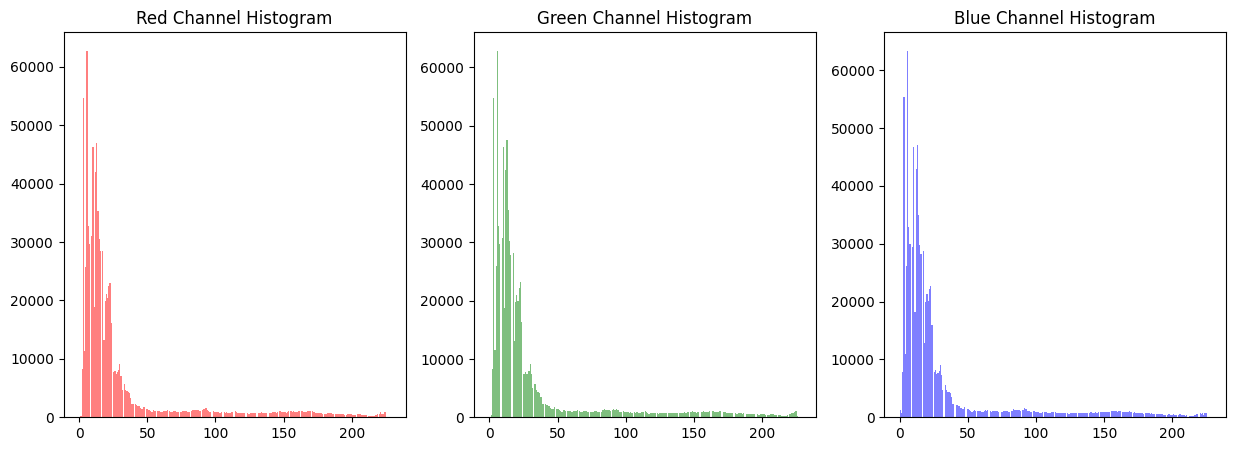

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 이미지 파일 경로
t_path = 'keras_dataset/images/val/Q_098_20_F_01_M0_G0_C0_01.jpg'

# 이미지를 로드합니다.
t_image = load_img(t_path)
image_array = img_to_array(t_image)

# 각 채널 분리
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

# 각 채널의 픽셀 값 히스토그램 그리기
plt.figure(figsize=(15, 5))

# Red 채널 히스토그램
plt.subplot(1, 3, 1)
plt.hist(red_channel.flatten(), bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')

# Green 채널 히스토그램
plt.subplot(1, 3, 2)
plt.hist(green_channel.flatten(), bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')

# Blue 채널 히스토그램
plt.subplot(1, 3, 3)
plt.hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')

plt.show()


In [17]:
print(image_array.shape)
print(image_array.dtype)

(1280, 720, 3)
float32


In [3]:
import numpy as np

# 채널 간의 차이 계산
diff_rg = np.abs(red_channel - green_channel)
diff_rb = np.abs(red_channel - blue_channel)
diff_gb = np.abs(green_channel - blue_channel)

# 채널 간 차이의 최대값 출력
print("Red-Green 채널 차이의 최대값:", np.max(diff_rg))
print("Red-Blue 채널 차이의 최대값:", np.max(diff_rb))
print("Green-Blue 채널 차이의 최대값:", np.max(diff_gb))


Red-Green 채널 차이의 최대값: 16.0
Red-Blue 채널 차이의 최대값: 24.0
Green-Blue 채널 차이의 최대값: 14.0


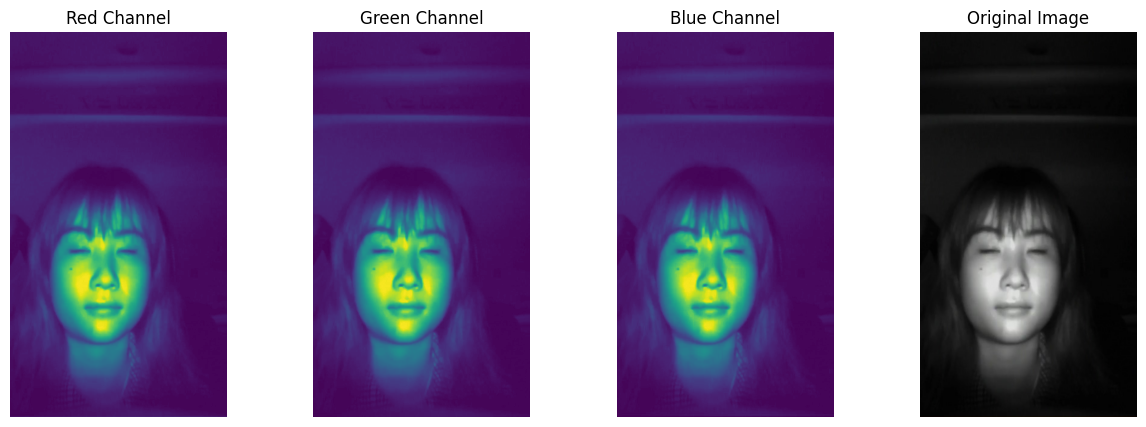

In [4]:
# 시각화 설정
plt.figure(figsize=(15, 5))

# Red 채널
plt.subplot(1, 4, 1)
plt.imshow(red_channel)
plt.title('Red Channel')
plt.axis('off')

# Green 채널
plt.subplot(1, 4, 2)
plt.imshow(green_channel)
plt.title('Green Channel')
plt.axis('off')

# Blue 채널
plt.subplot(1, 4, 3)
plt.imshow(blue_channel)
plt.title('Blue Channel')
plt.axis('off')

# 원본 이미지
plt.subplot(1, 4, 4)
plt.imshow(image_array.astype('uint8'))
plt.title('Original Image')
plt.axis('off')

plt.show()


In [5]:
print("Red 채널 - 최소값: {}, 최대값: {}, 평균값: {:.2f}".format(np.min(red_channel), np.max(red_channel), np.mean(red_channel)))
print("Green 채널 - 최소값: {}, 최대값: {}, 평균값: {:.2f}".format(np.min(green_channel), np.max(green_channel), np.mean(green_channel)))
print("Blue 채널 - 최소값: {}, 최대값: {}, 평균값: {:.2f}".format(np.min(blue_channel), np.max(blue_channel), np.mean(blue_channel)))


Red 채널 - 최소값: 0.0, 최대값: 228.0, 평균값: 32.34
Green 채널 - 최소값: 0.0, 최대값: 228.0, 평균값: 32.40
Blue 채널 - 최소값: 0.0, 최대값: 228.0, 평균값: 32.23


In [6]:
# 채널을 1D 배열로 변환
red_flat = red_channel.flatten()
green_flat = green_channel.flatten()
blue_flat = blue_channel.flatten()

# 상관계수 계산
corr_rg = np.corrcoef(red_flat, green_flat)[0, 1]
corr_rb = np.corrcoef(red_flat, blue_flat)[0, 1]
corr_gb = np.corrcoef(green_flat, blue_flat)[0, 1]

print("Red-Green 채널 상관계수:", corr_rg)
print("Red-Blue 채널 상관계수:", corr_rb)
print("Green-Blue 채널 상관계수:", corr_gb)


Red-Green 채널 상관계수: 0.9999102909987765
Red-Blue 채널 상관계수: 0.9997995709035846
Green-Blue 채널 상관계수: 0.9998719740047933
